<center> <h2> DS 3000 - Fall 2021</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3>E-Commerce Trends</h3> </center>
<center><h4>Armaan Pruthi, Angel Gong, Aritra Saharay</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

The e-commerce industry has exploded in the past decade and it is evident that shopping trends have shifted to adjust to this new environment. We would like to know how companies have adapted and whether they have done a good job of doing so. Our data was scraped from Kaggle as multiple datasets that we combined and cleaned. We then transformed our data to add new and more concise columns. After visualizing our dataset, we began to train our model. We tested many classification and regression algorithms and concluded that classification is better as our target is a discrete review score, and Gaussian Naive Bayes had the highest accuracy of our models. To tune our model we scaled our features and conducted a grid search by implementing various var_smoothness values to our GNB model. Our model ended with a classification accuracy of about 58%.


<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

<h4>Problem Statement</h4>

Online shopping has become commonplace for consumers. The e-commerce industry has exploded in the past decade and it is evident that shopping trends have shifted to adjust to this new environment. However, it is not obvious how to pinpoint why or how these trends have changed. We would like to know how companies have adapted and whether they have done a good job of doing so. Empirical data will hopefully show trends in consumer habits when shopping online versus shopping traditionally in-person. 

<h4>Significance of the Problem</h4>

Potential concerns include whether ecommerce is faster or more economical for consumers, how the existence of e-commerce affects the trends of traditional in-person shopping, and how e-commerce differs by geographical location (e.g. products are more expensive in some areas or are made available in some areas but not others). Analyzing ecommerce data could provide many useful insights for companies as to how online shopping trends differ from traditional in-person shopping trends such as the types of products consumers are more likely to purchase online, or if online shopping captures audiences that in-person shopping does not and why (https://www.bigcommerce.com/blog/online-shopping-statistics/#5-essential-online-shopping-statistics). It would be to the benefit of both consumers and retailers to better understand how effective e-commerce is, as retailers could capitalize and make more profit, and consumers would enjoy better service by having it catered to their needs.


<h4>Questions</h4>

 * Can the title and message of a review comment be used to predict the review score?
 * Can the price of a product be used to predict its review score?
 * Can the difference between the expected and actual delivery dates be used to predict the review score?
 * Which ML Algorithm is the most accurate in predicting the review score from our feature list?
 * Which ML Algorithm is the least overfit before tuning?
 * Is classification or regression better for our problem?
 * Are Brazilian e-commerce trends similar to other countries?

<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

A dataset recording transactions from Olist (a large ecommerce company that sells and ships a variety of products from different companies similar to Amazon) from 2016 to 2018. Our data came from multiple smaller datsets that are linked through customer_id. These individual datasets contain information on customers, geolocation, order items, order payments, order reviews, orders, products, and sellers. The entire dataset, when combined and after removing missing values, has 3095 entries and 50 columns. 


In [23]:
import pandas as pd

# load all our datasets
olist_customers_dataset = pd.read_csv("https://raw.githubusercontent.com/Ari-S-123/DS-3000-Final-Project/main/olist_customers_dataset.csv")
olist_geolocation_dataset = pd.read_csv("https://raw.githubusercontent.com/Ari-S-123/DS-3000-Final-Project/main/olist_geolocation_dataset.csv")
olist_order_items_dataset = pd.read_csv("https://raw.githubusercontent.com/Ari-S-123/DS-3000-Final-Project/main/olist_order_items_dataset.csv")
olist_order_payments_dataset = pd.read_csv("https://raw.githubusercontent.com/Ari-S-123/DS-3000-Final-Project/main/olist_order_payments_dataset.csv")
olist_order_reviews_dataset = pd.read_csv("https://raw.githubusercontent.com/Ari-S-123/DS-3000-Final-Project/main/olist_order_reviews_dataset.csv")
olist_orders_dataset = pd.read_csv("https://raw.githubusercontent.com/Ari-S-123/DS-3000-Final-Project/main/olist_orders_dataset.csv")
olist_products_dataset = pd.read_csv("https://raw.githubusercontent.com/Ari-S-123/DS-3000-Final-Project/main/olist_products_dataset.csv")
olist_sellers_dataset = pd.read_csv("https://raw.githubusercontent.com/Ari-S-123/DS-3000-Final-Project/main/olist_sellers_dataset.csv")
product_category_name_translation = pd.read_csv("https://raw.githubusercontent.com/Ari-S-123/DS-3000-Final-Project/main/product_category_name_translation.csv")

# join our datasets together 
df_olist = pd.concat([olist_customers_dataset, olist_geolocation_dataset, olist_order_items_dataset, 
          olist_order_payments_dataset, olist_order_reviews_dataset, olist_orders_dataset, 
          olist_products_dataset, olist_sellers_dataset], axis=1, join='inner')
df_olist


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1037,-23.545621,-46.639292,sao paulo,SP,...,287.0,1.0,225.0,16.0,10.0,14.0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1046,-23.546081,-46.644820,sao paulo,SP,...,276.0,1.0,1000.0,30.0,18.0,20.0,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1046,-23.546129,-46.642951,sao paulo,SP,...,250.0,1.0,154.0,18.0,9.0,15.0,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1041,-23.544392,-46.639499,sao paulo,SP,...,261.0,1.0,371.0,26.0,4.0,26.0,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1035,-23.541578,-46.641607,sao paulo,SP,...,402.0,4.0,625.0,20.0,17.0,13.0,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,849f55b3f039513a3394254b3be4dc7e,8d8a2e4656a4c446f26f1bcc7e5e4a64,6700,cotia,SP,1131,-23.521642,-46.647476,são paulo,SP,...,941.0,1.0,1300.0,100.0,8.0,15.0,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,9f4a95fe0b7a6b9cc179746f59c4c3f8,2fd69e505bd07d780abb92d163969c87,38407,uberlandia,MG,1120,-23.532640,-46.638179,sao paulo,SP,...,1498.0,1.0,1500.0,20.0,17.0,17.0,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,dc209078aac879d81cb29627ce96863d,f7cb6525ea921db8a653633f798bf51f,58703,patos,PB,1129,-23.524373,-46.647432,sao paulo,SP,...,890.0,1.0,409.0,16.0,11.0,12.0,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,ffa6685e943cc587dcc80d8de8e9ddcc,864793bc45eb84a40f2f9ff90c2a94a5,20560,rio de janeiro,RJ,1137,-23.522292,-46.654270,sao paulo,SP,...,570.0,2.0,725.0,19.0,14.0,15.0,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


### 2.2. Data Analysis

Our target variable is the review score for a given product, which is a discrete integer between 1 and 5 inclusive. Thus, we are unsure whether our final model will tackle a regression or classification problem. If a regression algorithm is used, our model will return a continuous number between 1 and 5. To determine the accuracy of our model, we will round this continuous value to the nearest whole number to match the format of our target variable. We can then find the r^2 value for our training and testing set to test its accuracy. If a classification algorithm is used, 
we do not need to round our predicted values and can test its performance using classification accuracy. 

* Classification Algorithms
 * k-Nearest Neighbors:
       * kNN assumes that the data values are similar in some way so that the model can classify new data into existing groups that share those similarities.For our dataset, review scores can be categorized into ratings of 1 through 5. We expect that poor reviews (e.g. 1 star reviews) will have similarities such as the use of negative words in their comments and converse for positive reviews. An important caveat is that our dataset comes from a company in Brazil so the comments are written in Portuguese. We will have to translate the comments into English which introduce errors in mistranslation.
 * Gaussian Naive Bayes:
	   * Gaussian Naive Bayes assumes that the continuous independent data associated with every class is normally distributed. For every data point, the difference in z-score between the point and every class mean is calculated.  
 * Decision Tree:
	   * Decision Trees split the dataset into a tree with a root node with many binary decision nodes. Each split in the tree represents an attribute that is used to make predictions.
    
* Regression Algorithms:
 * Linear Support Vector Regression:
     * Support Vector Machines can not only be used in classification problems, but also for regression. It works by creating a line of best fit that maximizes the amount of distinct points on each side of the line. The advantages of SVR over normal linear regression is that SVM’s are more tolerant of nonlinear data. In addition, it is easy to tune a SVR model in order to change the model complexity and possibly modify the kernel used.
 * LASSO Regression:
    * LASSO regression uses ‘shrinkage’ to produce regression coefficients, which penalizes features determined to be of lesser importance by making their coefficients zero. For this to produce accurate results, we would need to assume that the features within the dataset have high correlation.
 * Ridge Regression:
    * Ridge regression aims to keep the cost function as low as possible. Before applying Ridge Regression, we would need to scale the data as the algorithm is sensitive to how scaled the inputs are. Thus, we need to assume that the inputs are scaled.
 * k-Nearest Neighbors Regressor:
     * kNN assumes that the data values are similar in some way so that the model can classify new data into existing groups that share those similarities. For our dataset, review scores can be categorized into ratings of 1 through 5. We expect that poor reviews (e.g. 1 star reviews) will have similarities such as the use of negative words in their comments and converse for positive reviews. An important caveat is that our dataset comes from a company in Brazil so the comments are written in Portuguese. We will have to translate the comments into English which introduce errors in mistranslation.
 * Linear Regression:
     * In linear regression, there are two kinds of variables: dependent and independent variables. The independent variable is unaffected by other variables. The dependendent variable is what the algorithm attempts to predict. The Mean Squared Error can be used to measure the accuracy of the algorithm as it shows the difference between the predicted target values and the actual target values.


<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling
In this section, you should do the following and explain why you are doing what you are doing. For each, you should include your code in a cell, followed by a sample output. For instance, if you are one-hot encoding one of your variables, you should first describe what it is and why you are doing it. You should then include your code in a cell, and the sample output should be available as well.

The following link is where we performed simple data cleaning (deleted rows with missing values when joining dataframe) and data wrangling in formatting our dataframe. 
* https://colab.research.google.com/drive/1HPR-ByrwvRlnBE5zv39MmAlGBZD3mw1b?usp=sharing

Do at least three of the following:
* Perform simple data cleaning (delete extra columns, deal with NA values, etc.)
* Perform data wrangling to get your features and target values (e.g., grouping your dataframe by columns, applying functions to format dataframes, etc.)
* Preprocess your variables (e.g., scaling/transforming feature variables to normalize them)
* Perform feature extraction (dummy variables, new features from existing features, etc.)

The first data wrangling task we accomplished was performing simple data cleaning by filling our NA Values in the cell below. 

In [24]:
df_olist["product_photos_qty"] = df_olist["product_photos_qty"].fillna(0)
df_olist["product_description_lenght"] = df_olist["product_description_lenght"].fillna(0)
df_olist["payment_installments"] = df_olist["payment_installments"].fillna(0)
df_olist["review_comment_title"] = df_olist["review_comment_title"].fillna("")
df_olist["review_comment_message"] = df_olist["review_comment_message"].fillna("")

The second Data Wrangling we did in this project is performing feature extraction, specifically by creating new features from existing features. The two features we created are the order delivery offset, which is the difference in days between the expected and actual order delivery date, and the product category name english, which is the english translation of each portuguese category name for each product. 

In [25]:
import re
import datetime
from datetime import timedelta

# create a Portuguese to English translation dictionary
df_names = product_category_name_translation
df_translations = pd.Series(df_names.product_category_name_english.values,index=df_names.product_category_name).to_dict()
df_translations

# This function converts a category name from Portuguese to English
# based on the translation in the df_translations dictionary
def translate_portuguese_to_english(portuguese_name):
    for k, v in df_translations.items():
        if (k == portuguese_name):
            return v
        
# Translate the product category_name from Portuguese to English
df_olist["product_category_name_english"] = df_olist["product_category_name"].apply(translate_portuguese_to_english)
df_olist["product_category_name_english"]

def calculate_days_from_date(date_string):
    if pd.isna(date_string):
        return datetime.date(2000, 1, 1)
    date_numbers = [int(s) for s in re.findall(r'-?\d+\.?\d*', date_string)]
    return datetime.date(abs(date_numbers[0]), abs(date_numbers[1]), abs(date_numbers[2]))

def zero_days_between(td):
    if td > timedelta(days = 2000):
        return 0
    else:
        return td.days

# create a new column that calculates the difference between the expected delivery date of a purchase and the actual delivery date in days
# a positive number indicates that the purchased item arrived early while a negative number indicates it arrived late
order_delivered_customer_date_asdate = df_olist["order_delivered_customer_date"].apply(calculate_days_from_date)
order_estimated_delivery_date_asdate = df_olist["order_estimated_delivery_date"].apply(calculate_days_from_date)
df_olist["order_delivered_offset"] = order_estimated_delivery_date_asdate - order_delivered_customer_date_asdate
df_olist["order_delivered_offset"] = df_olist["order_delivered_offset"].apply(zero_days_between)
df_olist[["order_delivered_offset", "product_category_name_english"]]


,order_delivered_offset,product_category_name_english
0,8,perfumery
1,6,art
2,18,sports_leisure
3,13,baby
4,10,housewares
...,...,...
3090,12,sports_leisure
3091,4,sports_leisure
3092,8,watches_gifts
3093,-1,sports_leisure


The following code is the extraction of our features and target values, where we performed no data wrangling. However, these lines of code are important for our model and must be done before our next acts of wrangling. 

In [26]:
df_olist.to_csv("df_olist.csv")

features = df_olist[["price", "order_delivered_offset", "product_description_lenght", "product_photos_qty", "payment_installments"]]
target = df_olist["review_score"]

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

lin = LinearRegression()
knn = KNeighborsRegressor()
svc = LinearSVR(C=0.1, max_iter=100000)
rid = Ridge()
las = Lasso()

reg_estimator = {"Linear Regression" : lin, "Ridge" : rid, "Lasso" : las, 
              "k-Nearest Neighbor" : knn, "Support Vector Machine" : svc}

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

knn = KNeighborsClassifier()
gnb = GaussianNB()
dtc = DecisionTreeClassifier()
cla_estimators = {"k-Nearest Neighbor" : knn, "Gaussian Naive Bayes" : gnb, "Decision Tree" : dtc}

features


,price,order_delivered_offset,product_description_lenght,product_photos_qty,payment_installments
0,58.90,8,287.0,1.0,8
1,239.90,6,276.0,1.0,1
2,199.00,18,250.0,1.0,1
3,12.99,13,261.0,1.0,8
4,199.90,10,402.0,4.0,2
...,...,...,...,...,...
3090,117.30,12,941.0,1.0,10
3091,44.90,4,1498.0,1.0,4
3092,29.90,8,890.0,1.0,1
3093,79.90,-1,570.0,2.0,3


The final data wrangling we did was scaling our features using MinMaxScaler. By doing this, we do not have to worry about outlier values and different scales for our distinct features. Running this algorithm on our training sets allowed us to increase our accuracy due to those stated reasons. 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

#create the scaler
scaler = MinMaxScaler()

#fit the scaler to the training data(features only)
scaler.fit(X_train) 

#transform X_train and X_test based on the (same) scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) 

X_train_scaled

array([[0.14226337, 0.66887417, 0.2303996 , 0.17647059, 0.39130435],
       [0.0325222 , 0.67549669, 0.23394031, 0.11764706, 0.        ],
       [0.02021538, 0.74834437, 0.27212949, 0.11764706, 0.        ],
       ...,
       [0.04024183, 0.78145695, 0.43879616, 0.05882353, 0.04347826],
       [0.01303609, 0.65562914, 0.27794638, 0.05882353, 0.        ],
       [0.05876063, 0.64900662, 0.03970663, 0.05882353, 0.2173913 ]])

### 3.2. Data Exploration

Our first visualization is a displot representing the density of review scores (as colored based on the legend) for each order delivered offset in days. We can see the mean of our distribution is at around 10 days as it seems to be normally distributed (but rather tall) and this is the location of our peak. The graph shows the individual density distribution for each review score and all are centered at this same point. 

Our second visualization is a displot representing the density of just review scores. With nothing else on the graph, it is easy to see that the majority of our reviews have a score of 5, while less have 4, then 1, then 3, then 2. This is crucial to know in order to mitigate bias, which can potentially negatively affect orders with a review score of 2, since this value has the least samples. 

Our final visualization is a histogram with the product photo quantity on the x-axis, the price on the y-axis, and the review score as the color. This graph shows the distribution of product photo quanitities, which have a tail on the right side. Each individual bar has a unique distribution of review scores, and this is important to visualizize before adding this feature into our model so we understand how it can affect our review score. 

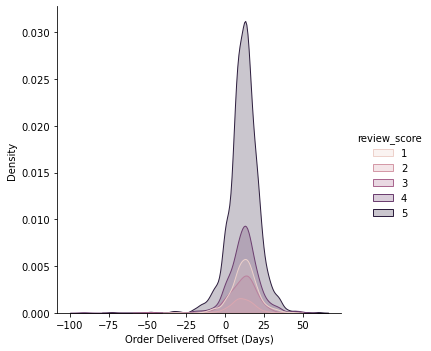

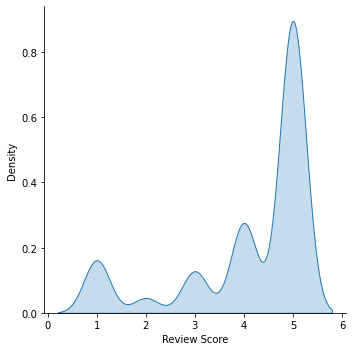

In [28]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

plot1 = sns.displot(df_olist, x="order_delivered_offset", hue="review_score", kind="kde", fill=True).set(xlabel="Order Delivered Offset (Days)")
plt.show()

plot2 = sns.displot(df_olist, x="review_score", kind="kde", fill=True).set(xlabel="Review Score")
plt.show()

fig = px.histogram(df_olist, x='product_photos_qty', y='price', color="review_score", template='seaborn')
fig.show()

### 3.3. Model Training

Testing regression algorithms

In [29]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

for estimator_name, estimator in reg_estimator.items():
    model = estimator.fit(X=X_train_scaled, y=y_train)
    r2_train = r2_score(y_train, model.predict(X_train_scaled))
    r2_test = r2_score(y_test, model.predict(X_test_scaled))
    print(f"{estimator_name}:")
    print(f"\t R-squared value for training set:  {r2_train}")
    print(f"\t R-squared value for training set:  {r2_test}")
    print("")

Linear Regression:
	 R-squared value for training set:  0.003828844303220613
	 R-squared value for training set:  -0.005211223127127962

Ridge:
	 R-squared value for training set:  0.003823516274303995
	 R-squared value for training set:  -0.004910135910236146

Lasso:
	 R-squared value for training set:  0.0
	 R-squared value for training set:  -0.0001856382482927632

k-Nearest Neighbor:
	 R-squared value for training set:  0.21517123623689793
	 R-squared value for training set:  -0.2801306327122006

Support Vector Machine:
	 R-squared value for training set:  -0.43042211190334334
	 R-squared value for training set:  -0.44041733925141946



Testing classification algorithms

In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

for key, value in cla_estimators.items():
    value.fit(X=X_train_scaled, y=y_train)
    
    #make predictions on the test set
    predicted = value.predict(X=X_test_scaled)
    
    #prediction accuracy
    accuracy = value.score(X_test_scaled, y_test)
    print(f"{key}:")
    print("\t" "Classification accuracy on the test data:", format(accuracy*100, ".2f"),"%")
    print("")

k-Nearest Neighbor:
	Classification accuracy on the test data: 48.06 %

Gaussian Naive Bayes:
	Classification accuracy on the test data: 58.14 %

Decision Tree:
	Classification accuracy on the test data: 39.41 %



Training based on selected features (POST RFE)

In [31]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
import numpy as np

def RFE_feature_selection():
    select = RFE(DecisionTreeRegressor(random_state = 3000), n_features_to_select = 3)
    select.fit(X_train_scaled, y_train)
    X_train_selected = select.transform(X_train_scaled)
    X_test_selected = select.transform(X_test_scaled)
    
    model = GaussianNB().fit(X=X_train_selected, y=y_train)
    
    print("Selected features after RFE:")
    for name, status in zip(df_olist[["price", "order_delivered_offset", "product_description_lenght", "product_photos_qty", "payment_installments"]], select.get_support()):
        if status:
            print(f"\t{name}")
        accuracy = model.score(X_test_selected, y_test)
    print("\nGaussian NB performance with selected features:")
    print("\t" "Classification accuracy on the test data:", format(accuracy*100, ".2f"),"%")
    
    return (X_train_selected, X_test_selected)


In [32]:
X_train_selected, X_test_selected = RFE_feature_selection()

Selected features after RFE:
	price
	order_delivered_offset
	product_description_lenght

Gaussian NB performance with selected features:
	Classification accuracy on the test data: 58.14 %


### 3.4. Model Optimization

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

params = {"var_smoothing" : [1e-13, 1e-12, 1e-11, 1e-10, 1e-9, 1e-8]}

grid_search = GridSearchCV(gnb, params, cv=10)

#fit the grid search object on the training data (CV will be performed on this)
grid_search.fit(X=X_train_scaled, y=y_train)

# result of grid search
print("Best estimator: ", grid_search.best_estimator_)
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best estimator:  GaussianNB(var_smoothing=1e-13)
Best parameters:  {'var_smoothing': 1e-13}
Best cross-validation score:  0.5812083764984461


### 3.5. Model Testing

In [34]:
print("Test set score: ", grid_search.score(X_test_scaled, y_test))

Test set score:  0.5813953488372093


<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION

We compared a variety of regression and classification algorithms in this project before settling on our final model. The algorithms used were k-Nearest Neighbors, Gaussian Naive Bayes, Decision Tree, Linear Support Vector Regression, LASSO Regression, Ridge Regression, k-Nearest Neighbors Regressor, and Linear Regression. The classification algorithms outperformed the regression algorithms, likely because our target value "review score" is discrete instead of continuous. Ultimately, we settled on the classification algorithm Gaussian Naive Bayes as it had an initial classification accuracy of 58%. Thus, Gaussian Naive Bayes was  used for our predictive model as it had the highest accuracy of all the algorithms we tested. In conclusion, we can use the features in our dataset to predict the outcome variable of review score. While almost 60% classification accuracy is not perfect, this number is high enoguh to allow us to make predictions with some confidence. However, one should not accept these results at face value, since there are no strong correlations between any features and our target value. Additionally, our dataframe's construction may have been biased since it groups many smaller dataframes together on a single id, where any entry with missing values is dropped before coming into our df_olist. Finally, our data should not be extrapolated to other countries with other servcies, such as Amazon in the USA, since these trends may not hold true in different regions of the world. 

For future work, we want to look into applying sentiment analysis to the product review messages. We didn't get a chance to apply it in the current report because of a lack of sentiment data to test our model against. This was due to Olist being a Brazilian company. The titles and reviews are all written in Portuguese which makes it difficult to get sentiment data from and to interpret this data. We only went as far as to set up a vectorizor for the comment messages and titles, and constructed a list of Portuguese stop words to further tune the data.

In [35]:
# Portuguese Stop Words
stop_words = pd.read_csv("https://raw.githubusercontent.com/Ari-S-123/DS-3000-Final-Project/main/stop_words_portuguese.csv", names=["word"])
stop_words_portuguese = stop_words["word"].tolist()

In [36]:
features_comment = df_olist["review_comment_message"]
features_title = df_olist["review_comment_title"]

In [37]:
X_train_comment, X_test_comment, y_train_comment, y_test_comment = train_test_split(features_comment, target, random_state=3000)
X_train_title, X_test_title, y_train_title, y_test_title = train_test_split(features_title, target, random_state=3000)

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize(train, test):
    vect = TfidfVectorizer(stop_words=stop_words_portuguese, ngram_range=(1,2), min_df=2).fit(train)

    #encode the words in X_train and X_test based on the vocabulary
    X_train_vectorized = vect.transform(train)
    X_test_vectorized = vect.transform(test)
    
    return X_train_vectorized, X_test_vectorized

In [39]:
#encode the words in X_train and X_test based on the vocabulary
X_train_comment_vectorized, X_test_comment_vectorized = vectorize(X_train_comment, X_test_comment)
X_train_title_vectorized, X_test_title_vectorized = vectorize(X_train_title, X_test_title)

In [40]:
from sklearn.naive_bayes import MultinomialNB

#train the classifier
model_comment = MultinomialNB(alpha = 0.5).fit(X=X_train_comment_vectorized, y=y_train_comment)
model_title = MultinomialNB(alpha = 0.5).fit(X=X_train_title_vectorized, y=y_train_title)

print("Review Comment Messages")
print("Classification accuracy on training set: ", model_comment.score(X_train_comment_vectorized, y_train_comment))
print("Classification accuracy on testing set: ", model_comment.score(X_test_comment_vectorized, y_test_comment))
print("\nReview Comment Titles")
print("Classification accuracy on training set: ", model_title.score(X_train_title_vectorized, y_train_title))
print("Classification accuracy on testing set: ", model_title.score(X_test_title_vectorized, y_test_title))

Review Comment Messages
Classification accuracy on training set:  0.6785868160275743
Classification accuracy on testing set:  0.6162790697674418

Review Comment Titles
Classification accuracy on training set:  0.6031882809133994
Classification accuracy on testing set:  0.5968992248062015


<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS

Overall, our group did an amazing job working together in the completion of this project. Our group had set meeting times where we met on Zoom to work through various aspects of this project together. We were all consistent in attending and communicating any conflicts prior to our meetings. Specifically, Armaan shared his screen and typed the majority of the report. Ari and Angel worked on our data exploration graphs, and Angel tackled the majority of our sentiment analysis work. Other than these minute differences, we completed the rest of this project as a group, talking through every problem together. 